## Задания

1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.
3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

## Задание 1

In [68]:
text= open("textharry.txt", 'r', encoding='utf-8')
text1= text.read() #читаю текст
words= text1.split() 
text2=text1.lower() #привожу к нижнему регистру
text3=[words.strip('!.,?:\(\);\'«»\"-') for words in text2.split()] #обрезаю пунктуацию
text4=' '.join(text3) #объединяю через пробел

In [84]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
text5=word_tokenize(text4) #токинезирую текст 
wnl= WordNetLemmatizer()
text6= [wnl.lemmatize(word, pos='v') for word in text5] #лемматизирую текст
text7=[wnl.lemmatize(word, pos='n') for word in text6]

In [85]:
text8=" ".join(text7)
with open ("newtext.txt", 'w', encoding='utf-8') as f:#записываю в новый файл
    f.write(text8)

## Задание 2

In [107]:
count=len(text7) #считаю общее количество слов в тексте
print(count)

text9=text8.split()
counts = {}  #сортирую список слов по частотности
for word in text7:
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1 #получаю несортированный словарь
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True) #сортирую в порядке убывания -X
words={} #создаю словарь
for value in sorted_counts: #пишу цикл, далее прописываю формулу и распечатываю получившийся ipm, -Y
    words[value[0]] = value[1]/count*1000000

79686


ValueError: x and y must have same first dimension, but have shapes (4944,) and (4943,)

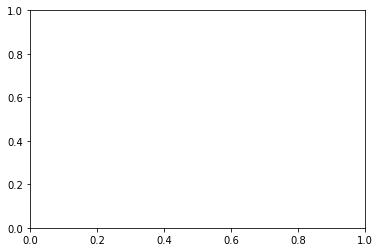

In [130]:
import matplotlib.pyplot as plt #Строю график

X = [] #задаю оси 
for word in range(len(counts)+1):
    X.append(word)
Y = [x[1] for x in sorted_counts]

plt.plot(X,Y)
plt.title("Проверка закона Ципфа") # Подписываю график и оси
plt.xlabel("Ранг (порядковый номер) слова")
plt.ylabel("Относительная частота слова")

plt.show()

## Задание 3

In [108]:
from nltk.corpus import stopwords # Очищаю текст от стоп-слов
sw = stopwords.words('english')
filtered = [w for w in word_tokenize(text8) if w not in sw]

In [89]:
from collections import Counter 
final = Counter(filtered)
print(final.most_common(30))

[('harry', 1305), ("'s", 995), ('say', 925), ("n't", 828), ('get', 457), ('ron', 427), ('look', 394), ('go', 393), ('hagrid', 366), ('could', 301), ('know', 287), ("'d", 267), ('hermione', 267), ('back', 263), ('one', 250), ('think', 237), ('see', 234), ('like', 206), ('come', 199), ('tell', 178), ("'ve", 176), ('professor', 172), ('take', 172), ('try', 168), ('snape', 167), ("'ll", 160), ('dumbledore', 156), ('would', 153), ('make', 141), ('around', 141)]


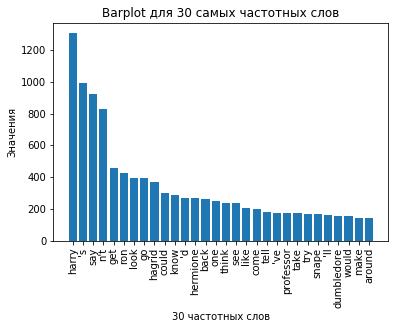

In [90]:
import matplotlib
X = range(30) #задаю оси 
Y = [word[1] for word in final.most_common(30)]

plt.bar(X, Y)
plt.xticks(X, [w[0] for w in final.most_common(30)], rotation=90) #Задаю отметки для оси Х и поворачиваю их на 90 градусов
plt.title("Barplot для 30 самых частотных слов") # Подписываю график и оси
plt.xlabel("30 частотных слов")
plt.ylabel("Значения")
plt.show()